# S&P 500 Analysis

In [477]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [478]:
# Define the start and end years (YYYY)
start_year = '1974'
end_year = '2025'

In [479]:
plt.rcParams.update({
    'axes.titlesize': 20,
    'axes.labelsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14
})

## Raw Data

In [480]:
daily_df = pd.read_csv("SPX_1927_2024.csv")
daily_df['Date'] = pd.to_datetime(daily_df['Date'], format='%d/%m/%Y')
display(daily_df)

,Date,Close,Open,High,Low
0,1927-12-30,17.66,17.66,17.66,17.66
1,1928-01-03,17.76,17.76,17.76,17.76
2,1928-01-04,17.72,17.72,17.72,17.72
3,1928-01-05,17.55,17.55,17.55,17.55
4,1928-01-06,17.66,17.66,17.66,17.66
...,...,...,...,...,...
24342,2024-11-25,5987.37,5992.28,6020.75,5963.91
24343,2024-11-26,6021.63,6000.03,6025.42,5992.27
24344,2024-11-27,5998.74,6014.11,6020.16,5984.87
24345,2024-11-29,6032.38,6003.98,6044.17,6003.98


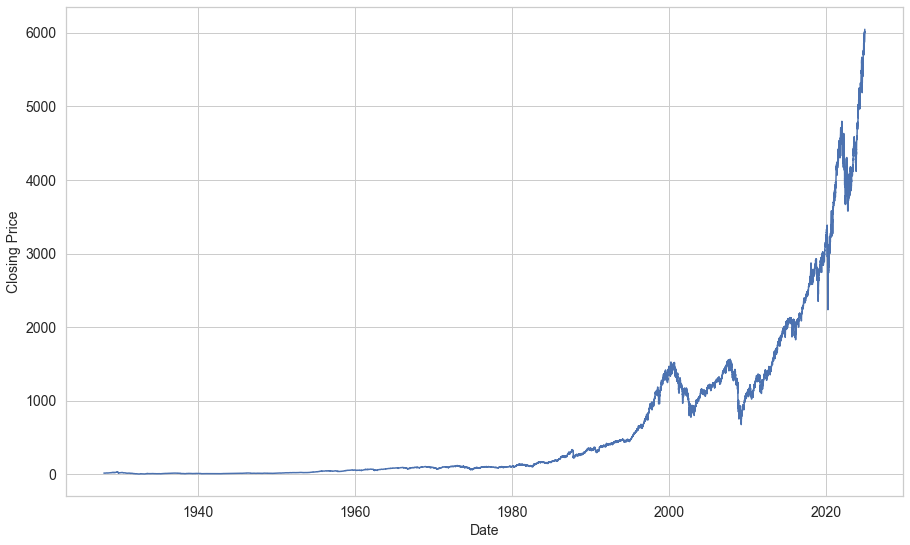

In [481]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,9))
sns.lineplot(data=daily_df, x="Date", y="Close")

plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

## Daily, Monthly and Yearly Charts

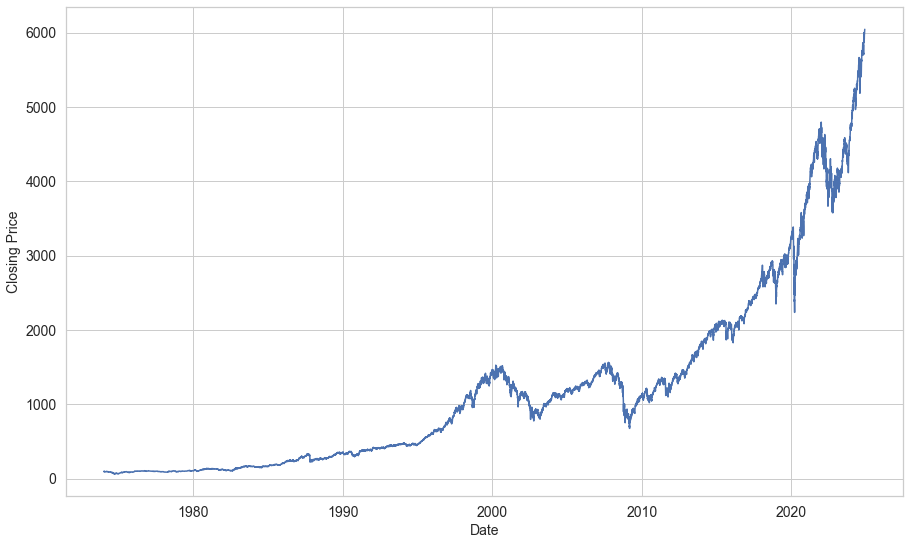

In [482]:
# Slice the DataFrame
daily_df = daily_df[(daily_df['Date'] >= start_year) & (daily_df['Date'] <= end_year)]

sns.set(style="whitegrid")

plt.figure(figsize=(15,9))
sns.lineplot(data=daily_df, x="Date", y="Close")

plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [483]:
display(daily_df)

,Date,Close,Open,High,Low
11506,1974-01-02,97.68,97.55,98.38,96.25
11507,1974-01-03,99.80,98.02,100.94,98.02
11508,1974-01-04,98.90,99.80,100.70,97.70
11509,1974-01-07,98.07,98.90,99.31,96.86
11510,1974-01-08,96.12,98.07,98.26,95.58
...,...,...,...,...,...
24342,2024-11-25,5987.37,5992.28,6020.75,5963.91
24343,2024-11-26,6021.63,6000.03,6025.42,5992.27
24344,2024-11-27,5998.74,6014.11,6020.16,5984.87
24345,2024-11-29,6032.38,6003.98,6044.17,6003.98


In [484]:
yearly_data = []
monthly_data = []

for year in range(int(start_year),int(end_year)):

    start_date = str(year) + '-01-01'
    end_date = str(year) + '-12-31'

    year_data_df = daily_df[(daily_df['Date'] >= start_date) & (daily_df['Date'] <= end_date)]

    y_open = year_data_df["Open"].iloc[0]
    y_close = year_data_df["Close"].iloc[-1]
    y_low = year_data_df["Low"].min()
    y_high = year_data_df["High"].max()

    yearly_data.append([year, y_close, y_open, y_high, y_low])

    for month in range(1,13):

        start_date = str(year) + "-" + str(month) + "-" + "01"
        end_date = str(year) + "-" + str(month + 1) + "-" + "01"
        if month + 1 == 13:
            end_date = str(year + 1) + "-" + "01" + "-" + "01"

        month_data_df = daily_df[(daily_df['Date'] >= start_date) & (daily_df['Date'] < end_date)]

        m_open = month_data_df["Open"].iloc[0]
        m_close = month_data_df["Close"].iloc[-1]
        m_low = month_data_df["Low"].min()
        m_high = month_data_df["High"].max()

        monthly_data.append([str(year) + "-" + str(month), m_close, m_open, m_high, m_low])


In [485]:
monthly_df = pd.DataFrame(data=monthly_data, columns=["Date", "Close", "Open", "High", "Low"])
monthly_df['Date'] = pd.to_datetime(monthly_df['Date'], format='%Y-%m')
display(monthly_df)

,Date,Close,Open,High,Low
0,1974-01-01,96.57,97.55,100.94,91.62
1,1974-02-01,96.22,96.57,97.43,89.53
2,1974-03-01,93.98,96.22,101.05,93.44
3,1974-04-01,90.31,93.98,95.42,88.62
4,1974-05-01,87.28,90.31,93.59,85.87
...,...,...,...,...,...
607,2024-08-01,5648.40,5537.84,5651.62,5119.26
608,2024-09-01,5762.48,5623.89,5767.37,5402.62
609,2024-10-01,5705.45,5757.73,5878.46,5674.00
610,2024-11-01,6032.38,5723.22,6044.17,5696.51


In [486]:
yearly_df = pd.DataFrame(data=yearly_data, columns=["Date", "Close", "Open", "High", "Low"])
yearly_df['Date'] = pd.to_datetime(yearly_df['Date'], format='%Y')
display(yearly_df)

,Date,Close,Open,High,Low
0,1974-01-01,68.56,97.55,101.05,60.96
1,1975-01-01,90.19,68.65,96.58,68.65
2,1976-01-01,107.46,90.19,108.72,89.81
3,1977-01-01,95.10,107.46,107.97,90.01
4,1978-01-01,96.11,95.10,108.05,86.45
5,1979-01-01,107.94,96.11,112.16,95.22
6,1980-01-01,135.76,107.94,141.96,94.23
7,1981-01-01,122.55,135.76,140.32,110.19
8,1982-01-01,140.64,122.55,144.36,102.20
9,1983-01-01,164.93,140.65,172.65,138.08


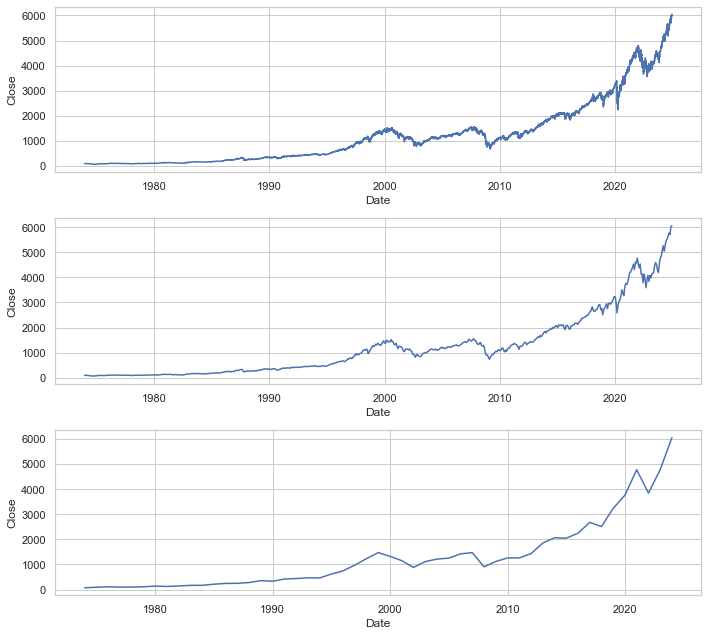

In [487]:
fig, axes = plt.subplots(3, 1, figsize=(10,9))

sns.lineplot(ax=axes[0], data=daily_df, x="Date", y="Close")
sns.lineplot(ax=axes[1], data=monthly_df, x="Date", y="Close")
sns.lineplot(ax=axes[2], data=yearly_df, x="Date", y="Close")
plt.tight_layout()

## Analysis

### Yearly

In [488]:
yearly_df["% Change"] = yearly_df.apply(lambda row: round(((row["Close"] - row["Open"])/row["Open"])*100, 2), axis=1)
display(yearly_df)

,Date,Close,Open,High,Low,% Change
0,1974-01-01,68.56,97.55,101.05,60.96,-29.72
1,1975-01-01,90.19,68.65,96.58,68.65,31.38
2,1976-01-01,107.46,90.19,108.72,89.81,19.15
3,1977-01-01,95.10,107.46,107.97,90.01,-11.50
4,1978-01-01,96.11,95.10,108.05,86.45,1.06
5,1979-01-01,107.94,96.11,112.16,95.22,12.31
6,1980-01-01,135.76,107.94,141.96,94.23,25.77
7,1981-01-01,122.55,135.76,140.32,110.19,-9.73
8,1982-01-01,140.64,122.55,144.36,102.20,14.76
9,1983-01-01,164.93,140.65,172.65,138.08,17.26


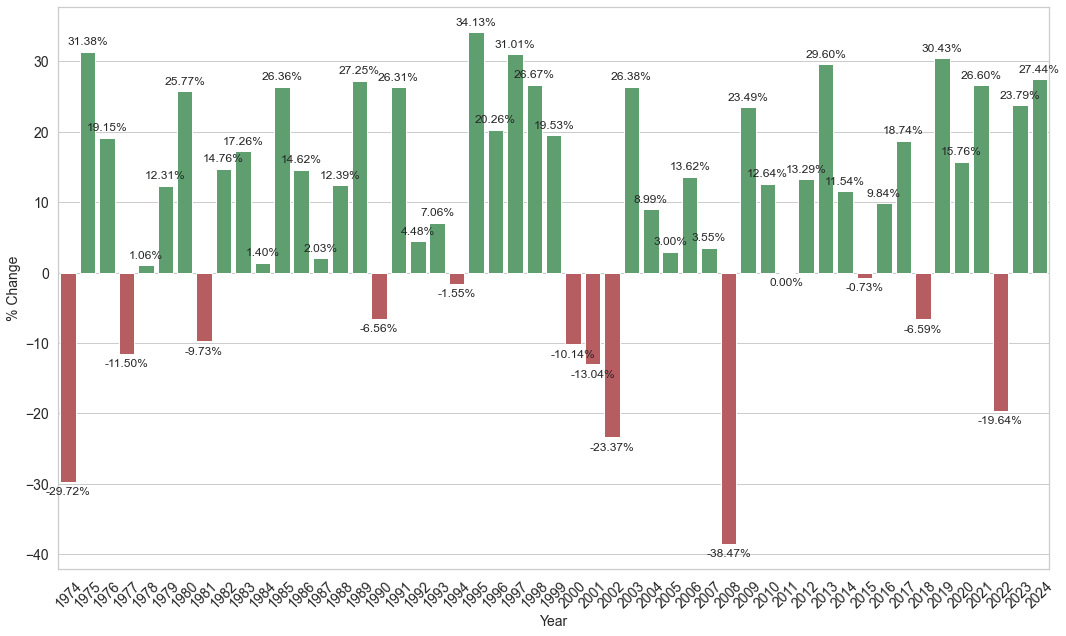

In [489]:
colors = ["g" if val >= 0 else "r" for val in yearly_df["% Change"]]

plt.figure(figsize=(15,9))
plt.xticks(rotation=45)
barplot = sns.barplot(data=yearly_df, x=yearly_df["Date"].dt.year, y="% Change", palette=colors)
for p in barplot.patches: 
    if p.get_height() > 0:
        barplot.annotate(f'{p.get_height():.2f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 10), 
                        textcoords = 'offset points')
    else:
        barplot.annotate(f'{p.get_height():.2f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, -10), 
                        textcoords = 'offset points')

plt.xlabel("Year", fontsize=14)
plt.ylabel("% Change", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

In [490]:
yearly_df["% Change"].describe()

count    51.000000
mean      9.859804
std      16.936914
min     -38.470000
25%       0.530000
50%      12.640000
75%      24.780000
max      34.130000
Name: % Change, dtype: float64

In [491]:
positive_years = yearly_df[(yearly_df['% Change'] >= 0)].shape[0]
negative_years = yearly_df[(yearly_df['% Change'] < 0)].shape[0]

pos_percent = round(positive_years/(positive_years + negative_years)*100, 2)
neg_percent = round(negative_years/(positive_years + negative_years)*100, 2)

print(f"Number of positive years in period: {positive_years} - Percentage of positive years: {pos_percent}%")
print(f"Number of negative years in period: {negative_years} - Percentage of negative years: {neg_percent}%")

Number of positive years in period: 39 - Percentage of positive years: 76.47%
Number of negative years in period: 12 - Percentage of negative years: 23.53%


(array([-50., -40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

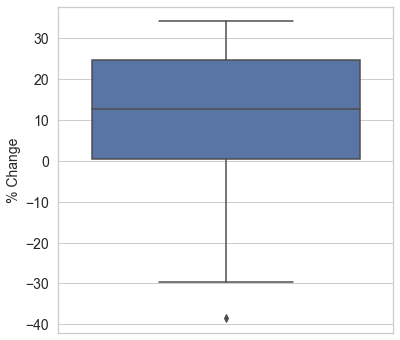

In [492]:
plt.figure(figsize=(6,6))
sns.boxplot(data=yearly_df, y="% Change")
plt.ylabel('% Change', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [493]:
years_change_distribution = []

## < -30%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] < -30)].shape[0])
## -30% <= % Change < -20%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= -30) & (yearly_df['% Change'] < -20)].shape[0])
## -20% <= % Change < -10%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= -20) & (yearly_df['% Change'] < -10)].shape[0])
## -10% <= % Change < 0%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= -10) & (yearly_df['% Change'] < 0)].shape[0])
## 0% <= % Change < 10%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= 0) & (yearly_df['% Change'] < 10)].shape[0])
## 10% <= % Change < 20%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= 10) & (yearly_df['% Change'] < 20)].shape[0])
## 20% <= % Change < 30%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= 20) & (yearly_df['% Change'] < 30)].shape[0])
## >= 30%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= 30)].shape[0])

In [494]:
years_change_distribution_df = pd.DataFrame(
    data={
        "% Change": ["< -30%", "-30% to -20%", "-20% to -10%", "-10% to 0%", "0% to 10%", "10% to 20%", "20% to 30%", ">= 30%"],
        "# Years": years_change_distribution
    }
)
display(years_change_distribution_df)

,% Change,# Years
0,< -30%,1
1,-30% to -20%,2
2,-20% to -10%,4
3,-10% to 0%,5
4,0% to 10%,10
5,10% to 20%,13
6,20% to 30%,12
7,>= 30%,4


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

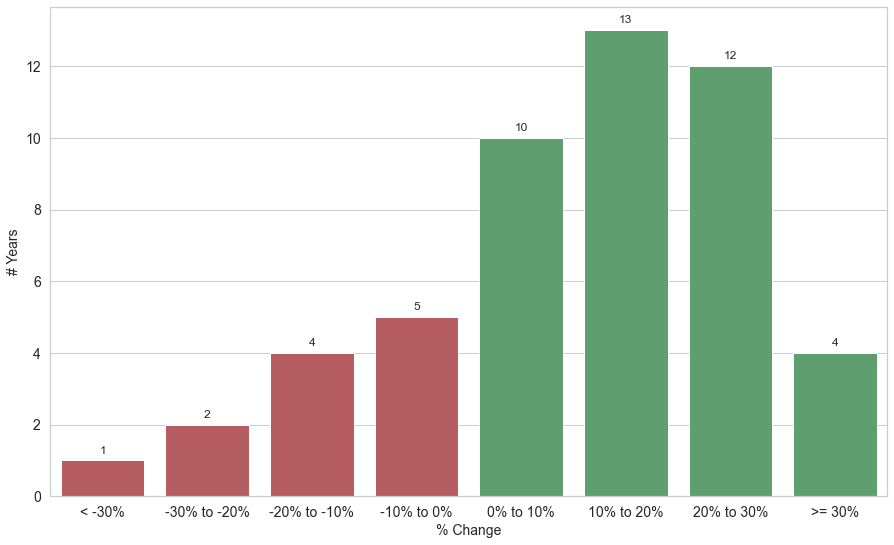

In [495]:
c1 = ["r" for i in range(4)]
c2 = ["g" for i in range(4)]
colors = c1 + c2

plt.figure(figsize=(15,9))
barplot = sns.barplot(data = years_change_distribution_df, x="% Change", y="# Years", palette=colors)
for p in barplot.patches: 
    if p.get_height() > 0:
        barplot.annotate(f'{p.get_height():.0f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 10), 
                        textcoords = 'offset points')
        
plt.xlabel('% Change', fontsize=14)
plt.ylabel('# Years', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### Monthly

In [496]:
monthly_df["% Change"] = monthly_df.apply(lambda row: round(((row["Close"] - row["Open"])/row["Open"])*100, 2), axis=1)
display(monthly_df)

,Date,Close,Open,High,Low,% Change
0,1974-01-01,96.57,97.55,100.94,91.62,-1.00
1,1974-02-01,96.22,96.57,97.43,89.53,-0.36
2,1974-03-01,93.98,96.22,101.05,93.44,-2.33
3,1974-04-01,90.31,93.98,95.42,88.62,-3.91
4,1974-05-01,87.28,90.31,93.59,85.87,-3.36
...,...,...,...,...,...,...
607,2024-08-01,5648.40,5537.84,5651.62,5119.26,2.00
608,2024-09-01,5762.48,5623.89,5767.37,5402.62,2.46
609,2024-10-01,5705.45,5757.73,5878.46,5674.00,-0.91
610,2024-11-01,6032.38,5723.22,6044.17,5696.51,5.40


In [497]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

months_dfs = []

for i in range(1,13):
    months_dfs.append(monthly_df[monthly_df["Date"].dt.month == i])

In [498]:
for month, month_df in zip(months, months_dfs):
    print("---------------------------------")
    print(f"Descriptive Statistics for {month}")
    print(month_df["% Change"].describe())

---------------------------------
Descriptive Statistics for Jan
count    51.000000
mean      1.193333
std       5.054984
min      -8.540000
25%      -2.635000
50%       1.430000
75%       4.130000
max      13.180000
Name: % Change, dtype: float64
---------------------------------
Descriptive Statistics for Feb
count    51.000000
mean      0.108235
std       4.010937
min     -10.690000
25%      -2.465000
50%       0.690000
75%       2.995000
max       7.150000
Name: % Change, dtype: float64
---------------------------------
Descriptive Statistics for Mar
count    51.000000
mean      1.025294
std       4.165491
min     -13.100000
25%      -1.210000
50%       1.870000
75%       3.495000
max       9.670000
Name: % Change, dtype: float64
---------------------------------
Descriptive Statistics for Apr
count    51.000000
mean      1.614902
std       4.308039
min      -8.990000
25%      -0.925000
50%       0.930000
75%       4.055000
max      16.590000
Name: % Change, dtype: float64
--------

In [499]:
monthly_averages = []

for month_df in months_dfs:

    monthly_averages.append(month_df["% Change"].mean())

monthly_averages_df = pd.DataFrame(
    data={
        "Month": months,
        "Average % Change": monthly_averages
    }
)

display(monthly_averages_df)

,Month,Average % Change
0,Jan,1.193333
1,Feb,0.108235
2,Mar,1.025294
3,Apr,1.614902
4,May,0.788235
5,Jun,0.541373
6,Jul,0.861765
7,Aug,-0.062549
8,Sep,-1.092941
9,Oct,1.032157


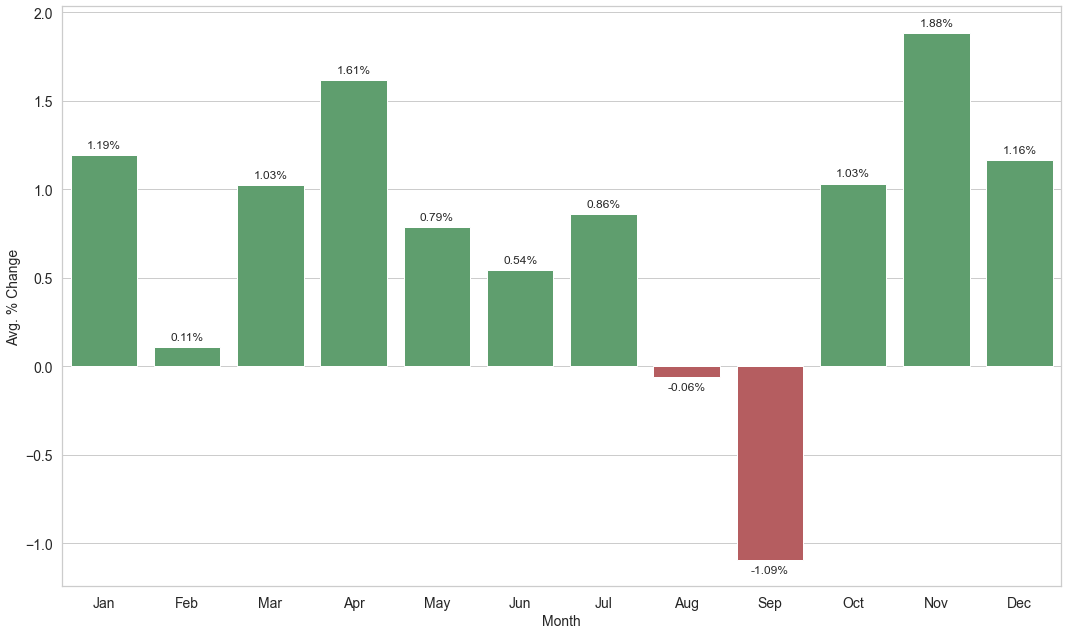

In [503]:
colors = ["g" if val >= 0 else "r" for val in monthly_averages_df["Average % Change"]]

plt.figure(figsize=(15,9))
barplot = sns.barplot(data=monthly_averages_df, x="Month", y="Average % Change", palette=colors)
for p in barplot.patches: 
    if p.get_height() > 0:
        barplot.annotate(f'{p.get_height():.2f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 10), 
                        textcoords = 'offset points')
    else:
        barplot.annotate(f'{p.get_height():.2f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, -10), 
                        textcoords = 'offset points')

plt.xlabel('Month', fontsize=14)
plt.ylabel('Avg. % Change', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

### Daily

In [501]:
daily_df["% Change"] = daily_df.apply(lambda row: round(((row["Close"] - row["Open"])/row["Open"])*100, 2), axis=1)
display(daily_df)

,Date,Close,Open,High,Low,% Change
11506,1974-01-02,97.68,97.55,98.38,96.25,0.13
11507,1974-01-03,99.80,98.02,100.94,98.02,1.82
11508,1974-01-04,98.90,99.80,100.70,97.70,-0.90
11509,1974-01-07,98.07,98.90,99.31,96.86,-0.84
11510,1974-01-08,96.12,98.07,98.26,95.58,-1.99
...,...,...,...,...,...,...
24342,2024-11-25,5987.37,5992.28,6020.75,5963.91,-0.08
24343,2024-11-26,6021.63,6000.03,6025.42,5992.27,0.36
24344,2024-11-27,5998.74,6014.11,6020.16,5984.87,-0.26
24345,2024-11-29,6032.38,6003.98,6044.17,6003.98,0.47


In [502]:
daily_df["% Change"].describe()

count    12841.000000
mean         0.032910
std          1.031499
min        -20.470000
25%         -0.450000
50%          0.050000
75%          0.540000
max         10.790000
Name: % Change, dtype: float64